# Unsupervised Learning

Clustering is an unsupervisedlearning method that allows us to group set of objects based on similar characteristics. In general, it can help you find meaningful structure among your data, group similar data together and discover underlying patterns.


## K-MEANS CLUSTERING

K means works through the following iterative process:

1.Pick a value for k (the number of clusters to create) 2.Initialize k ‘centroids’ (starting points) in your data 3.Create your clusters. Assign each point to the nearest centroid. 4.Make your clusters better. Move each centroid to the center of its cluster. 5.Repeat steps 3–4 until your centroids converge.

Iris data set of scikit learn consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It has four features from each sample: length and width of sepals and petals.

## Importing Relevant Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

## Importing The Dataset

In [35]:
iris = datasets.load_iris()

## Overview Of Dataset

In [36]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Defining target and predictors.

In [37]:
X = iris.data[:, :2]
y = iris.target

## Vizualising data through a scatter plot.

Text(0, 0.5, 'Sepal Width')

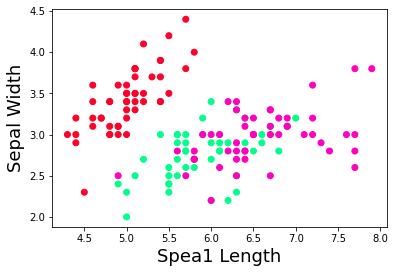

In [38]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

### Now, let’s instantiate and fit our K means cluster model. We are going to use three clusters and a random state of 21.

In [39]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

### Identifying the center points of the data

In [40]:
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


### Now, let’s compare our original data versus our clustered results

Text(0.5, 1.0, 'Predicted')

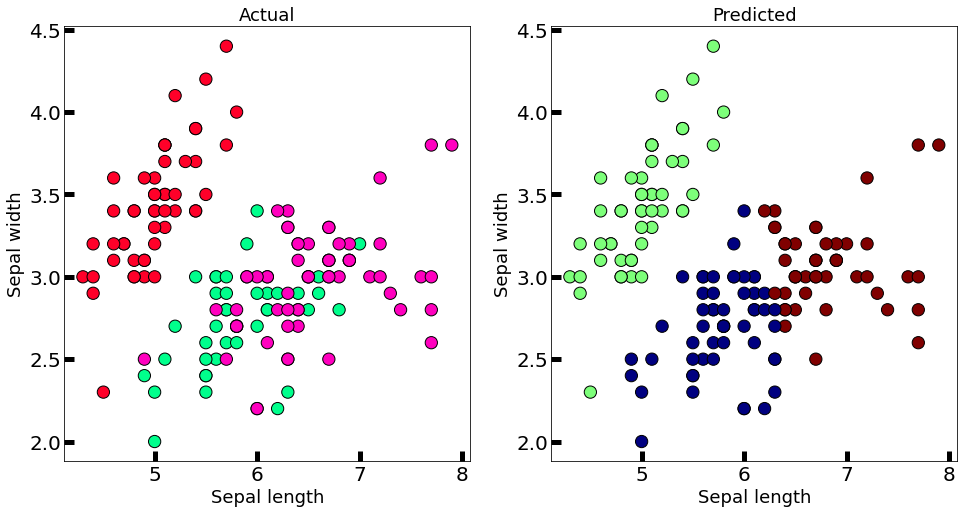

In [41]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

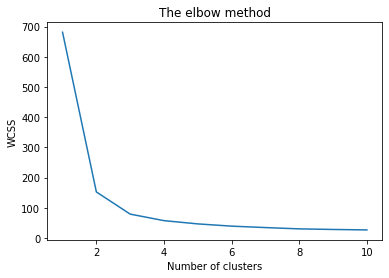

In [50]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## DBSCAN CLUSTERING

Density-based spatial clustering of applications with noise, or DBSCAN, is a popular clustering algorithm used as a replacement for k-means in predictive analytics. To run it doesn’t require an input for the number of clusters but it does need to tune two other parameters.

The scikit-learn implementation provides a default for the eps and min_samples parameters, but you’re generally expected to tune those. The eps parameter is the maximum distance between two data points to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a neighborhood to be considered a cluster.

### Importing Libraries

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

### Declaring and Fitting model

In [43]:
# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(iris.data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

### Transforming Using PCA

In [44]:
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

### Plot based on Class

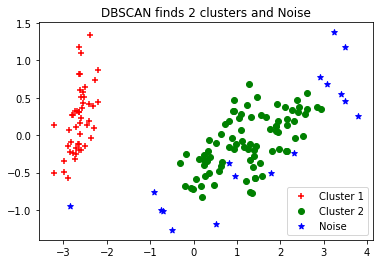

In [45]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()